# Recognizing Traffic Signals with Keras CNN

![traffic_signal](https://www.rhinocarhire.com/CorporateSite/media/Drive-Smart/Road-Signs/Spain-Road-Signs.jpg)

Hello Kagglers,

In this notebook I present you a simple convolutional networks model for the classification of about 40 classes of German traffic signs.

The development of the model and preprocessing of the images will be done with the Keras library. I will always try to prioritize simplicity, so that those who are starting with neural networks can benefit from it.

Without further ado, let's get started. I hope you enjoy it.

## The data

Extracted from the Kaggle dataset description:

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. The benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

## Index

1. [Importing the necessary libraries](#section1)
2. [Load and format the data](#section2)
3. [Preprocessing the data](#section3)
4. [The model](#section4)
5. [Validation of the model](#section5)

### <a id='section1'>1. Importing the necessary libraries</a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import os
import warnings

warnings.filterwarnings("ignore")

### <a id='section2'>2. Load and format the data</a>

In [2]:
# We will time our model
start = time.time()

input_path = "./data/archive/"

image_data = []
image_labels = []

# Number of total classes
total_classes = 43

# Dimensions of our images
height = 32
width = 32
channels = 3

In [3]:
# Load the images from the correct path
for i in range(total_classes):
    path = input_path + "Train/" + str(i)
    images = os.listdir(path)
    
    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, "RGB")
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in Image loading")
            
# Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

# Time taken to load our images in seconds
end = time.time()
print("Time taken: ", round(end-start, 5), "seconds")

Time taken:  12.88464 seconds


### <a id='section3'>3. Preprocessing the data</a>

In [4]:
# Shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)

image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [5]:
# Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2,
                                                     random_state=2666, shuffle=True)

# Scale the values between 0 and 1
X_train = X_train / 255
X_valid = X_valid / 255

# The dimensions concur
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [6]:
# Converting the labels into one hot encoding
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

# The dimensions concur
print(y_train.shape)
print(y_valid.shape)

(31367, 43)
(7842, 43)


In [7]:
keras.backend.clear_session() # Clearing previous session if there was any
np.random.seed(2666)

### <a id='section4'>4. The model</a>

**Why convolutional networks**

Color images commonly have over 30 million pixels per channel. Quickly we understand why ordinary neural networks were not feasible for comupting these figures. 

Convolution layers are the crux of the convolutional neural network. They use filters to extract features from the input image. A filter is also referred to as a kernel or feature detector. It can be thought of as a sliding window of weights. These weights are learned during training. That is, a CNN “learns” filters that are proficient at detecting certain types of visual features, such as a straight line, a semi-circle, and other image features that may be meaningless to humans, but that are helpful in determining a correct outcome.

Filters usually have small width and height and, of course, they share the same depth as the input. For a color image, the filter depth is 3, for the three color channels of blue, green, and red. For a black and white image, the filter depth is 1.

We slide the filter over the image at a certain stride, and the dot product is computed. Stride is simply the number of pixels we slide over each time we move the window. The dot products create a new matrix called the convolved feature or activation map or feature map.

![Convlayer](https://miro.medium.com/max/1206/1*ZPXWZDIHFbTxs-6KVPS5gg.png)

**LeNet** is a convolutional neural network structure proposed by Yann LeCun et al. in 1998. and is a simple convolutional neural network structure. This is the one we will implement here: In general, LeNet refers to lenet-5 and is a simple convolutional neural network. Note that LeNet uses `tahn` activation function and here we will use `reLu`.

In [8]:
# Create our model with Keras is straightforward
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=18, kernel_size=(5,5), strides=1, activation="relu", 
                        input_shape=(height, width, channels)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=36, kernel_size=(5,5), strides=1, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=36, kernel_size=(5, 5), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(1,1)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=72, activation="relu"),
    keras.layers.Dense(units=43, activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 18)        1368      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 18)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 36)        16236     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 36)          32436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0

In [9]:
# Compilation of our model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_valid, y_valid))
validation_data = (X_valid, y_valid)

Epoch 1/20
981/981 [==============================] - 19s 19ms/step - loss: 2.4827 - accuracy: 0.3448 - val_loss: 0.5811 - val_accuracy: 0.8403
Epoch 2/20
981/981 [==============================] - 19s 20ms/step - loss: 0.4942 - accuracy: 0.8594 - val_loss: 0.2863 - val_accuracy: 0.9268
Epoch 3/20
981/981 [==============================] - 19s 19ms/step - loss: 0.2669 - accuracy: 0.9297 - val_loss: 0.2007 - val_accuracy: 0.9486
Epoch 4/20
981/981 [==============================] - 19s 20ms/step - loss: 0.1731 - accuracy: 0.9536 - val_loss: 0.1381 - val_accuracy: 0.9670
Epoch 5/20
981/981 [==============================] - 19s 19ms/step - loss: 0.1210 - accuracy: 0.9668 - val_loss: 0.1137 - val_accuracy: 0.9722
Epoch 6/20
981/981 [==============================] - 19s 19ms/step - loss: 0.0912 - accuracy: 0.9752 - val_loss: 0.1219 - val_accuracy: 0.9679
Epoch 7/20
981/981 [==============================] - 19s 19ms/step - loss: 0.0692 - accuracy: 0.9821 - val_loss: 0.1389 - val_accuracy:

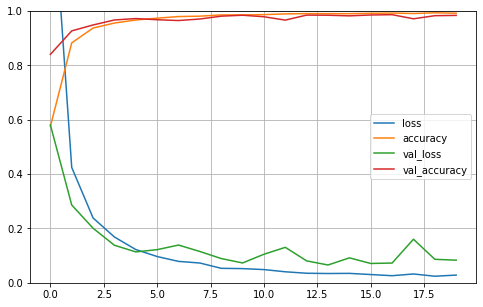

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### <a id='section5'> 5. Validation of the model</a>

In [11]:
# Testing accuracy on the reserved test set
test = pd.read_csv(input_path + "/Test.csv")

labels = test["ClassId"].values
test_imgs = test["Path"].values

(1, 32, 32, 3)
11


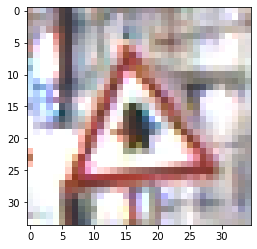

In [12]:
# How an image looks like
img_index = 25
image = Image.open(input_path + test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img) / 255.
img = img.reshape(1, height, width, channels)

print(img.shape)
print(labels[img_index])
plt.imshow(image)

We don't know what that 11 of the class means. Let us map these values and predict this same image afterwards

In [13]:
# Dictionary to map classes.
classes = { 
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
          }

In [14]:
# Prediction of this image
pred = model.predict_classes(img)[0]
print(pred)

sign = classes[pred]
print(sign)

11
Right-of-way at intersection


In [15]:
# Load and preprocess test set
start = time.time()
test = pd.read_csv(input_path + 'Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data = []

for img in imgs:
    try:
        image = cv2.imread(input_path + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error")
        
X_test = np.array(data)
X_test = X_test / 255

In [16]:
# Prediction of test set
pred = model.predict_classes(X_test)

#Accuracy with the test data
print(accuracy_score(labels, pred))
end = time.time()
print("Time taken: ", round(end-start,5), "seconds")

0.9190023752969121
Time taken:  19.78662 seconds


In [17]:
model.save('./model.h5')